In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

from pyquery import PyQuery as pq
from bs4 import BeautifulSoup
import requests

In [86]:

linkVec = []

for thisPage in [3]:#[2,3,4,5]:
    allLinkPage=requests.get("http://www.sirlinksalot.net/archives/thebachelor%d.html" % (thisPage))
    soup = BeautifulSoup(allLinkPage.text, "html.parser")
    rows = soup.find_all("a")
    for row in rows:
        rowString = str(row)
        checkASCII = [ord(letter) for letter in rowString]
        #print max(checkASCII),min(checkASCII)
        if max(checkASCII)<127 and min(checkASCII)>9:
        #    print max(checkASCII)<127 and min(checkASCII)>10
            thisLink = str(row.get("href"))
            if "sirlinksalot" not in thisLink: #remove internal links
                if "clickbank.net" not in thisLink: #remove ad links
                    if "pub43" not in thisLink: #remove ad links
                        if "bilbo" not in thisLink: #remove ad links
                            if "fastclick" not in thisLink: #remove ad links
                                if "casalemedia" not in thisLink: #remove ad links
                                    linkVec.append(thisLink)
                                


#cleaner = lambda r: [int(r[0].get_text()), r[1].get_text(), r[2].get_text(), r[2].find("a").get("href")]
#fields = ["ranking", "title", "band_singer", "url"]
#songs = [dict(zip(fields, cleaner(row.find_all("td")))) for row in rows]

In [87]:
print len(linkVec)

1753


In [90]:
#sort our vector to group similar website roots
linkVec = sorted(linkVec[0:20])

In [91]:
archivedLinkVec = []

count = 0;
length = len(linkVec)
for thisLink in linkVec:
    allLinkPage=requests.get("https://web.archive.org/web/*/" + thisLink)
    soup = BeautifulSoup(allLinkPage.text, "html.parser")
    if soup.find_all("div", attrs={"class": "date captures"}):
        row = soup.find_all("div", attrs={"class": "date captures"})[0]
        row = row.find("a").get("href")
        archivedLinkVec.append(str("https://web.archive.org" + row))
    count = count+1
    #print count, " out of ", length, " done"

In [92]:
#archivedLinkVec[0:40]
#https://web.archive.org/web/20130114020937/http://www.zap2it.com/news/pictures/zap-the-bachelor-meet-the-season-17-bachelorettes-20120925,0,7638604.photogallery?index=2

In [93]:
#we can assume that each article from the Examiner website will have similar HTML formatting. 
#So let us also note the root page.
rootPage = []
for link in archivedLinkVec:
    first = 50#link.find("www") 
    last = link.find(".com")+4
    rootPage.append(link[first:last])

In [94]:
#collect into a data frame
linkDF = pd.DataFrame()
linkDF['archived_link']=archivedLinkVec
linkDF['root_page']= rootPage


In [95]:
myGroups = linkDF.groupby('root_page')

In [96]:
count=0
for group in linkDF.root_page.unique():
    if group:
        count = count+1
        print group
print
print "There are",count, "unique groups."
    
#this shows that the number of unique websites whose formatting we need to learn is pretty limited.

abclocal.go.com
abcnews.go.com
bachelor.blogs.pressdemocrat.com
blog.syracuse.com
blog.zap2it.com

There are 5 unique groups.


In [163]:
#SEASON 13 BLUE BACKGROUND
season13PicLinks=[]

for j in range(897,922):
    season13PicLinks.append("http://images.buddytv.com/btv_2_500311%d_1_590_-1_0_/meet-the-cast-of--th.jpg" % j)

In [156]:
#SEASON 14 BLUE BACKGROUND

season14Link = "http://www.realitytea.com/2009/12/17/meet-the-25-bachelorettes-of-the-bachelor-14-on-the-wings-of-love-photos/"
season14PicLinks = []
testPage=requests.get(season14Link)
soup = BeautifulSoup(testPage.text, "html.parser")
rows = soup.find_all("img")
for row in rows:
    if row.get("src"):
        if "the-bachelor-14" in row.get("src"):
            season14PicLinks.append(str(row.get("src")))

In [157]:
#SEASON 15 BLUE BACKGROUND
#all on one page --  yay!
season15Link = "http://www.realitytea.com/2010/12/21/photos-meet-the-25-bachelorettes-of-brad-womacks-the-bachelor-15/"
season15PicLinks = []
testPage=requests.get(season15Link)
soup = BeautifulSoup(testPage.text, "html.parser")
rows = soup.find_all("img")
for row in rows:
    if row.get("src"):
        if "the-bachelor-15" in row.get("src"):
            season15PicLinks.append(str(row.get("src")))

In [158]:
#SEASON 16 BLUE BACKGROUND
#all on one page --  yay!
season16Link = "http://www.realitytea.com/2011/12/12/photos-%E2%80%93-meet-the-25-bachelorettes-of-ben-flajnik%E2%80%99s-the-bachelor-season-16/"
season16PicLinks = []
testPage=requests.get(season16Link)
soup = BeautifulSoup(testPage.text, "html.parser")
rows = soup.find_all("img")
for row in rows:
    if row.get("src"):
        if "the-bachelor-16" in row.get("src"):
            season16PicLinks.append(str(row.get("src")))

In [159]:
#SEASON 17 BLUE BACKGROUND
season17PicLinks=[]
for i in range(2,9):
    season17PicLinks.append("https://web.archive.org/web/20151113223542/http://www.trbimg.com/img-50620939/turbine/zap-the-bachelor-meet-the-season-17-bacheloret-00%d/600" % i)
for j in range(10,29):
    season17PicLinks.append("https://web.archive.org/web/20151113223542/http://www.trbimg.com/img-50620939/turbine/zap-the-bachelor-meet-the-season-17-bacheloret-0%d/600" % j)

In [160]:
#SEASON 18 BLUE BACKGROUND
season18Links=[]
for k in range(71,98):
    season18Links.append("http://www.usmagazine.com/entertainment/pictures/the-bachelor-season-18-meet-juan-pablos-bachelorettes-2013412/343%d" % k)
season18PicLinks = []
for link in season18Links:
    testPage=requests.get(link)
    soup = BeautifulSoup(testPage.text, "html.parser")
    rows = soup.find_all("img")
    for row in rows:
        if row.get("src"):
            if "18-meet-juan-pablos" in row.get("src"):
                season18PicLinks.append(str(row.get("src")))

In [161]:
#SEASON 19 BLUE BACKGROUND
season19Links=[]
nameBank = ["Whitney","Becca","Kaitlyn","Jade","Carly","Britt","Megan","Kelsey","Ashley-I","Mackenzie","Samantha","Ashley-S","Juelia","Nikki","Jillian","Amber","Tracy","Trina","Alissa","Jordan","Kimberly","Tandra","Tara","Amanda","Bo","Brittany","Kara","Michelle","Nicole","Reegan"]
season19Links.append("http://www.usmagazine.com/entertainment/pictures/bachelor-season-19-chris-soules-bachelorettes-2014412/42609")
for k in range(10,39):
    season19Links.append("http://www.usmagazine.com/entertainment/pictures/bachelor-season-19-chris-soules-bachelorettes-2014412/426%d"%k)
season19PicLinks = []
for link in season19Links:
    testPage=requests.get(link)
    soup = BeautifulSoup(testPage.text, "html.parser")
    rows = soup.find_all("img")
    for row in rows:
        if row.get("src"):
            if "19-chris-soules-bachelorettes" in row.get("src"):
                season19PicLinks.append(str(row.get("src")))

In [165]:
#AGGREGATE PICS
allPicLinks = np.concatenate([season13PicLinks,season14PicLinks,season15PicLinks,season16PicLinks,season17PicLinks,season18PicLinks,season19PicLinks])
len(allPicLinks)

#might also be helpful: http://www.buddytv.com/tvshow/page/the-bachelor-cast-1.aspx

162

In [169]:
#SAVE ALL PICS TO LOCAL MACHINE
#only really need to do this once
#make sure you're in the right folder on your local machine

#import urllib
#count = 0
#for link in allPicLinks:
#    urllib.urlretrieve(link, "bachelorette_pics/bachelorette%d.jpg" % count)
#    count = count+1

In [228]:
picsAsMatrices = []
viableIndices = np.concatenate([range(0,5),range(6,11),range(12,20),range(21,162)])
for count in viableIndices:
    picsAsMatrices.append(sp.misc.imread("bachelorette_pics/bachelorette%d.jpg" % count))

In [242]:
import PIL
from PIL import Image

picsAsBinaryMatrices = []
for count in viableIndices:
    img = Image.open("bachelorette_pics/bachelorette%d.jpg" % count).convert('LA')
    #img.save("greyscale_pics/greyscale%d.png" % count)
    picsAsBinaryMatrices.append(img)

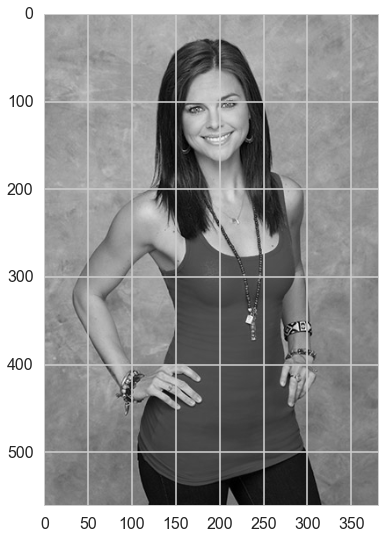

In [259]:
plt.imshow(picsAsBinaryMatrices[156]);
#testmat = np.asarray(picsAsBinaryMatrices[156])
#testmat2 = np.asarray(picsAsBinaryMatrices[157])